# High potential mouse design

Picking mutations that don't modify scores substantially, but make high-effect mutations accessible with one mutation.

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns

Full variant score table
--

In [2]:
df = pd.read_csv("results/final_variant_scores/final_variant_scores.csv")
df

,target,wildtype,position,position_IMTG,chain,mutant,mutation,codon,single_nt,bind,delta_bind,n_bc_bind,n_libs_bind,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr
0,CGG_naive,E,1,1.0,H,A,E1(H)A,GAG,True,10.48829,0.03110,15.0,2.0,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0
1,CGG_naive,E,1,1.0,H,C,E1(H)C,GAG,False,10.44477,-0.01243,19.0,2.0,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0
2,CGG_naive,E,1,1.0,H,D,E1(H)D,GAG,True,10.42771,-0.02948,13.0,2.0,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0
3,CGG_naive,E,1,1.0,H,E,E1(H)E,GAG,True,10.45719,0.00000,17528.0,2.0,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0
4,CGG_naive,E,1,1.0,H,F,E1(H)F,GAG,False,10.51899,0.06180,20.0,2.0,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,CGG_naive,NaN,121,NaN,link,S,NANA(link)S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4736,CGG_naive,NaN,121,NaN,link,T,NANA(link)T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4737,CGG_naive,NaN,121,NaN,link,V,NANA(link)V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4738,CGG_naive,NaN,121,NaN,link,W,NANA(link)W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gabriel's proposed mutations
--

In [3]:
high_potential_design = """
W41(H)L
Y58(H)H
T101(H)S
Y103(H)F
Y66(L)H
P50(L)L
Q105(L)N
D74(L)E
""".split()

In [4]:
df["label"] = "other"
df.loc[df.mutation.isin(high_potential_design), "label"] = "high potential"

Predicted binding, expression, and polyspecificity, assuming additivity of mutation effects
--

In [5]:
sum(df[df.label == "high potential"].delta_bind)

0.17145000000000002

In [6]:
sum(df[df.label == "high potential"].delta_expr)

-0.33835000000000004

In [7]:
sum(df[df.label == "high potential"].delta_psr)

0.94715

Target mutations that are accessible after the designed mutations
--

In [8]:
target_mutations = """
W41(H)V
Y58(H)P
T101(H)Y
Y103(H)I
Y66(L)R
P50(L)W
Q105(L)Y
D74(L)K
""".split()

In [9]:
df.loc[df.mutation.isin(target_mutations), "label"] = "newly accessible"

Predicted binding, expression, and polyspecificity of target mutations, assuming additivity of mutation effects
--

In [10]:
sum(df[df.label == "newly accessible"].delta_bind)

4.93668

In [11]:
sum(df[df.label == "newly accessible"].delta_expr)

-0.17146999999999996

In [12]:
sum(df[df.label == "newly accessible"].delta_psr)

2.8328800000000003

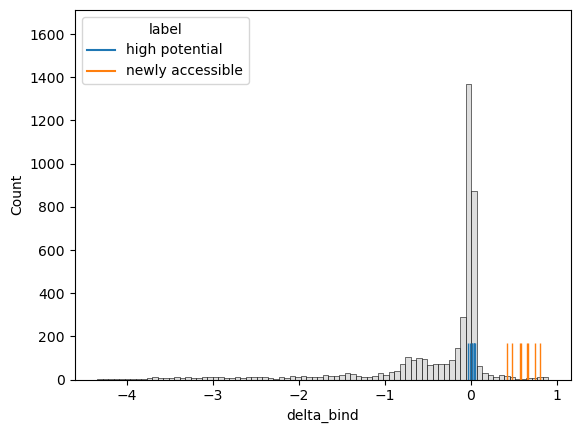

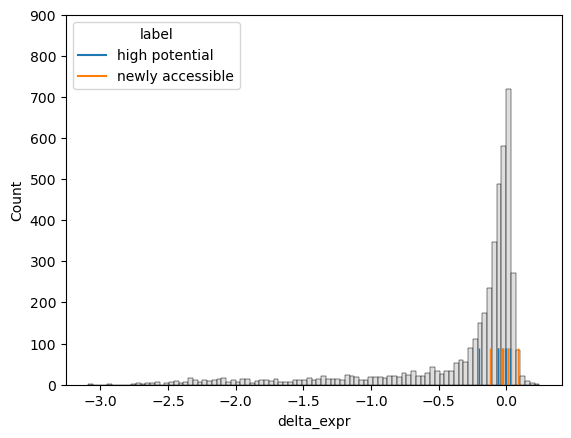

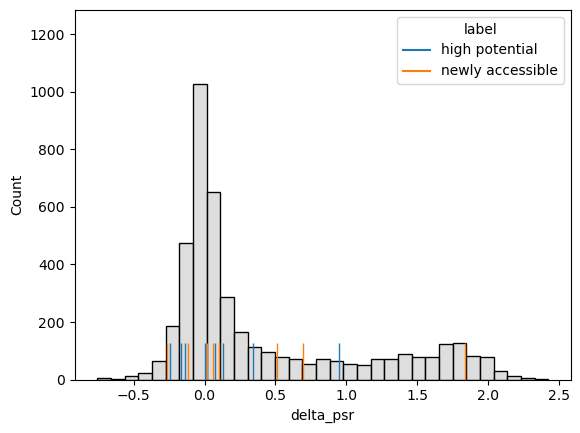

In [13]:
for phenotype in ("delta_bind", "delta_expr", "delta_psr"):
    sns.histplot(data=df, x=phenotype, color="lightgrey")
    sns.rugplot(data=df[df.label != "other"], x=phenotype, hue="label", height=0.1)
    plt.show()